In [104]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [105]:
df_train = pd.read_csv ('D:\Studies\Machine_Learning\Assignment_4\Google_Stock_Price_Trainset.csv')
df_test = pd.read_csv ('D:\Studies\Machine_Learning\Assignment_4\Google_Stock_Price_Testset.csv')

In [106]:
print(df_train.head())
print(df_test.head())

     Date        Open        High         Low       Close   Adj Close   Volume
0  1/4/16  743.000000  744.059998  731.257996  741.840027  741.840027  3272800
1  1/5/16  746.450012  752.000000  738.640015  742.580017  742.580017  1950700
2  1/6/16  730.000000  747.179993  728.919983  743.619995  743.619995  1947000
3  1/7/16  730.309998  738.500000  719.059998  726.390015  726.390015  2963700
4  1/8/16  731.450012  733.229980  713.000000  714.469971  714.469971  2450900
     Date         Open         High          Low        Close    Adj Close  \
0  1/4/21  1757.540039  1760.650024  1707.849976  1728.239990  1728.239990   
1  1/5/21  1725.000000  1747.670044  1718.015015  1740.920044  1740.920044   
2  1/6/21  1702.630005  1748.000000  1699.000000  1735.290039  1735.290039   
3  1/7/21  1740.060059  1788.400024  1737.050049  1787.250000  1787.250000   
4  1/8/21  1787.979980  1809.839966  1773.535034  1807.209961  1807.209961   

    Volume  
0  1901900  
1  1145300  
2  2602100  
3  22

In [107]:
print(df_train.shape)
print(df_test.shape)

(1259, 7)
(20, 7)


In [108]:
train_data = df_train.iloc[:,4]
test_data = df_test.iloc[:,4]

print(train_data.shape)
print(test_data.shape)

(1259,)
(20,)


In [109]:
maxval = max([max(train_data),max(test_data)])
minval = min([min(train_data),min(test_data)])

train_data_scaled = (train_data-minval)/(maxval-minval)
test_data_scaled = (test_data-minval)/(maxval-minval)

train_data_scaled = train_data_scaled.to_numpy()
test_data_scaled = test_data_scaled.to_numpy()

print(train_data_scaled.shape,test_data_scaled.shape)

(1259,) (20,)


In [122]:
data = np.concatenate((train_data_scaled,test_data_scaled))

(1279,)

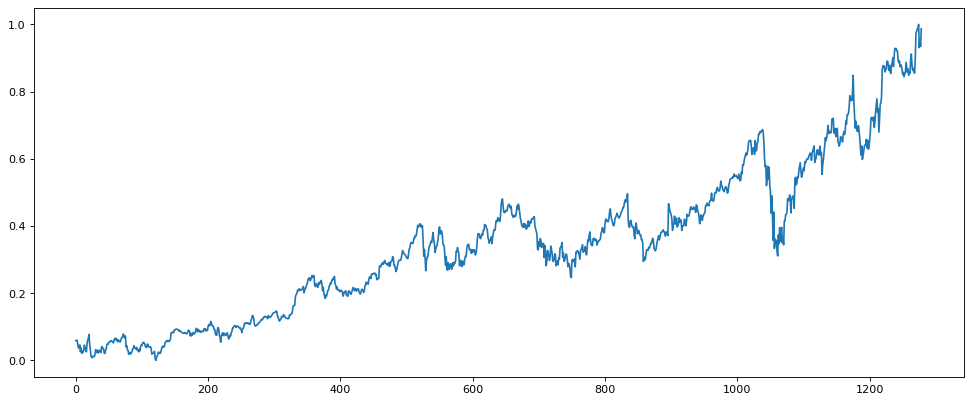

Epoch 1/20
1252/1252 - 2s - loss: 0.0034
Epoch 2/20
1252/1252 - 1s - loss: 0.0018
Epoch 3/20
1252/1252 - 1s - loss: 0.0016
Epoch 4/20
1252/1252 - 1s - loss: 0.0014
Epoch 5/20
1252/1252 - 1s - loss: 0.0013
Epoch 6/20
1252/1252 - 1s - loss: 0.0013
Epoch 7/20
1252/1252 - 1s - loss: 0.0012
Epoch 8/20
1252/1252 - 1s - loss: 0.0011
Epoch 9/20
1252/1252 - 1s - loss: 0.0011
Epoch 10/20
1252/1252 - 1s - loss: 0.0010
Epoch 11/20
1252/1252 - 1s - loss: 0.0010
Epoch 12/20
1252/1252 - 1s - loss: 9.7993e-04
Epoch 13/20
1252/1252 - 1s - loss: 9.5698e-04
Epoch 14/20
1252/1252 - 1s - loss: 9.2787e-04
Epoch 15/20
1252/1252 - 1s - loss: 9.1203e-04
Epoch 16/20
1252/1252 - 1s - loss: 8.6961e-04
Epoch 17/20
1252/1252 - 1s - loss: 8.4757e-04
Epoch 18/20
1252/1252 - 1s - loss: 8.0859e-04
Epoch 19/20
1252/1252 - 1s - loss: 7.9977e-04
Epoch 20/20
1252/1252 - 1s - loss: 7.7450e-04
Train RMSE: 0.027 RMSE
Test RMSE: 0.134 RMSE


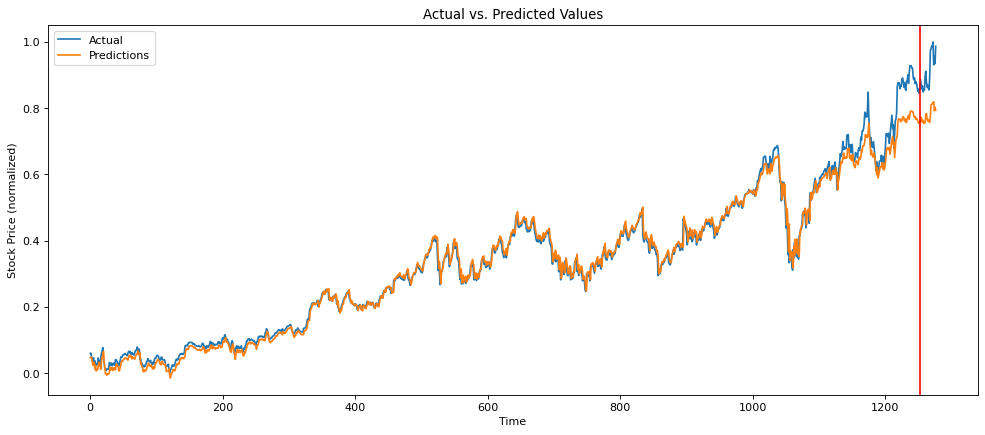

In [130]:
def get_train_test(data, split_percent=0.98):
    data = data
    n = len(data)
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
 
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = np.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = np.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Time')
    plt.ylabel('Stock Price (normalized)')
    plt.title('Actual vs. Predicted Values')

time_steps = 1

train_data, test_data, data = get_train_test(data)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

train_predict = model.predict(trainX)
test_predict = model.predict(testX)

print_error(trainY, testY, train_predict, test_predict)
plot_result(trainY, testY, train_predict, test_predict)
